In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
company = yf.Ticker("MSFT")

In [ ]:
company = company.history(period="max")

In [ ]:
company

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054485,0.062498,0.054485,0.059827,1031788800,0.00,0.0
1986-03-14 00:00:00-05:00,0.059827,0.063032,0.059827,0.061963,308160000,0.00,0.0
1986-03-17 00:00:00-05:00,0.061963,0.063566,0.061963,0.063032,133171200,0.00,0.0
1986-03-18 00:00:00-05:00,0.063032,0.063566,0.060895,0.061429,67766400,0.00,0.0
1986-03-19 00:00:00-05:00,0.061429,0.061963,0.059827,0.060361,47894400,0.00,0.0
...,...,...,...,...,...,...,...
2024-11-19 00:00:00-05:00,412.284740,417.105108,410.727858,416.955414,18133500,0.00,0.0
2024-11-20 00:00:00-05:00,416.037221,416.456396,409.759778,414.659973,19191700,0.00,0.0
2024-11-21 00:00:00-05:00,419.500000,419.779999,410.290009,412.869995,20780200,0.83,0.0


<Axes: xlabel='Date'>

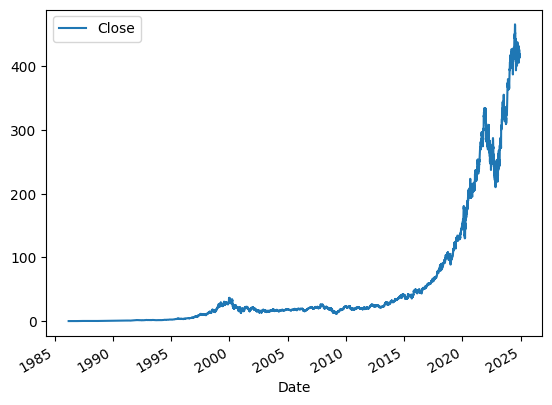

In [ ]:
company.plot.line(y="Close", use_index=True)

In [ ]:
del company["Dividends"]
del company["Stock Splits"]

Create a new column that contains the Next Day's Price

In [ ]:
company["Tomorrow"] = company["Close"].shift(-1)

In [ ]:
company["Target"] = (company["Tomorrow"] > company["Close"]).astype(int)

In [ ]:
company

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054485,0.062498,0.054485,0.059827,1031788800,0.061963,1
1986-03-14 00:00:00-05:00,0.059827,0.063032,0.059827,0.061963,308160000,0.063032,1
1986-03-17 00:00:00-05:00,0.061963,0.063566,0.061963,0.063032,133171200,0.061429,0
1986-03-18 00:00:00-05:00,0.063032,0.063566,0.060895,0.061429,67766400,0.060361,0
1986-03-19 00:00:00-05:00,0.061429,0.061963,0.059827,0.060361,47894400,0.058758,0
...,...,...,...,...,...,...,...
2024-11-19 00:00:00-05:00,412.284740,417.105108,410.727858,416.955414,18133500,414.659973,0
2024-11-20 00:00:00-05:00,416.037221,416.456396,409.759778,414.659973,19191700,412.869995,0
2024-11-21 00:00:00-05:00,419.500000,419.779999,410.290009,412.869995,20780200,417.000000,1


# Random Forest

Random Forest is a great choice because its prone to overfitting comparatively and is great to model non-linear relationships



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = company.iloc[:-150]
test = company.iloc[-150:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

pred = model.predict(test[predictors])
pred = pd.Series(pred, index=test.index)

In [ ]:
pred

,0
Date,
2024-04-24 00:00:00-04:00,0
2024-04-25 00:00:00-04:00,1
2024-04-26 00:00:00-04:00,0
2024-04-29 00:00:00-04:00,1
2024-04-30 00:00:00-04:00,1
...,...
2024-11-19 00:00:00-05:00,0
2024-11-20 00:00:00-05:00,0
2024-11-21 00:00:00-05:00,0


In [ ]:
precision_score(test["Target"], pred)

0.8

**Build a BackTesting System**

We will initially take the first 10 years data and use that to predict the prices of the 11th year. These 10 year cycle prices will be concatenated

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtesting(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtesting(company, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,4230
1,3025


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5104132231404959

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.510407
0,0.489593


Adding Predictors

In [ ]:
horizons = [2,5, 60, 250, 1000]
new_predictions = []

for horizon in horizons:
    rolling_averages = company.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    company[ratio_column] = company["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    company[trend_column] = company.shift(1).rolling(horizon).sum()["Target"]

    new_predictions += [ratio_column, trend_column]

In [ ]:
company

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1986-03-13 00:00:00-05:00,0.054485,0.062498,0.054485,0.059827,1031788800,0.061963,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.059827,0.063032,0.059827,0.061963,308160000,0.063032,1,1.017543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-17 00:00:00-05:00,0.061963,0.063566,0.061963,0.063032,133171200,0.061429,0,1.008552,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-18 00:00:00-05:00,0.063032,0.063566,0.060895,0.061429,67766400,0.060361,0,0.987120,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-19 00:00:00-05:00,0.061429,0.061963,0.059827,0.060361,47894400,0.058758,0,0.991229,0.0,0.984320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-19 00:00:00-05:00,412.284740,417.105108,410.727858,416.955414,18133500,414.659973,0,1.002435,2.0,0.994435,4.0,0.993404,34.0,1.011908,136.0,1.347594,519.0
2024-11-20 00:00:00-05:00,416.037221,416.456396,409.759778,414.659973,19191700,412.869995,0,0.997240,1.0,0.993553,3.0,0.987871,33.0,1.005950,135.0,1.339276,519.0
2024-11-21 00:00:00-05:00,419.500000,419.779999,410.290009,412.869995,20780200,417.000000,1,0.997837,0.0,0.995546,2.0,0.983486,33.0,1.001236,135.0,1.332618,518.0


In [ ]:
company = company.dropna()

In [ ]:
company

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-02-26 00:00:00-05:00,0.416651,0.427335,0.415583,0.424130,69220800,0.418788,0,1.008895,2.0,1.013789,4.0,1.110179,32.0,1.453914,131.0,2.011945,495.0
1990-02-27 00:00:00-05:00,0.425198,0.425198,0.418788,0.418788,62020800,0.421993,1,0.993663,1.0,1.005644,3.0,1.093954,31.0,1.432477,130.0,1.983250,494.0
1990-02-28 00:00:00-05:00,0.418788,0.426266,0.418788,0.421993,39312000,0.427335,1,1.003812,1.0,1.007910,4.0,1.099513,32.0,1.440323,130.0,1.995035,494.0
1990-03-01 00:00:00-05:00,0.420925,0.434813,0.420925,0.427335,76867200,0.443360,1,1.006289,2.0,1.013171,4.0,1.110596,32.0,1.455328,130.0,2.016798,495.0
1990-03-02 00:00:00-05:00,0.428404,0.446031,0.427869,0.443360,100209600,0.449770,1,1.018405,2.0,1.038019,4.0,1.148630,32.0,1.505500,131.0,2.088655,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18 00:00:00-05:00,414.041237,417.564184,411.276782,414.929474,24742000,416.955414,1,1.000915,1.0,0.987141,4.0,0.988746,33.0,1.007447,135.0,1.341953,519.0
2024-11-19 00:00:00-05:00,412.284740,417.105108,410.727858,416.955414,18133500,414.659973,0,1.002435,2.0,0.994435,4.0,0.993404,34.0,1.011908,136.0,1.347594,519.0
2024-11-20 00:00:00-05:00,416.037221,416.456396,409.759778,414.659973,19191700,412.869995,0,0.997240,1.0,0.993553,3.0,0.987871,33.0,1.005950,135.0,1.339276,519.0


In [ ]:
model2 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [30]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [31]:
predictions = backtesting(company, model2, new_predictions)

In [32]:
predictions.value_counts()

,,count
Target,Predictions,
1,0.0,2893
0,0.0,2779
1,1.0,296
0,1.0,286


In [33]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5085910652920962